In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers=pd.read_csv('Ecommerce Customers')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


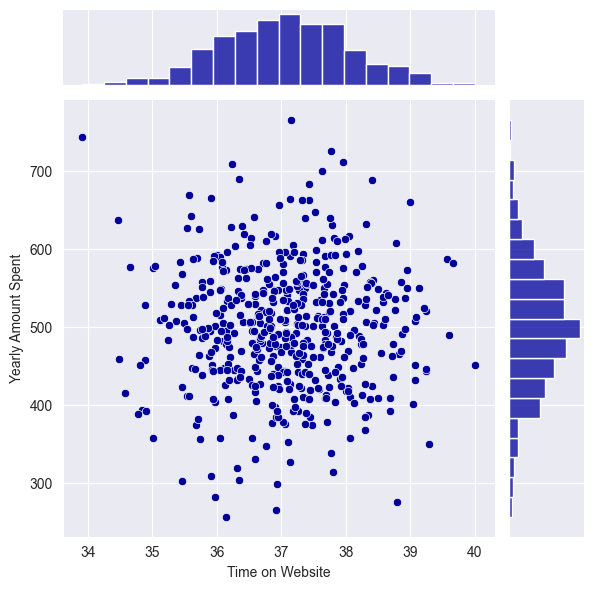

In [30]:
#EDA
sns.set_palette("seismic", 8)
sns.set_style('darkgrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

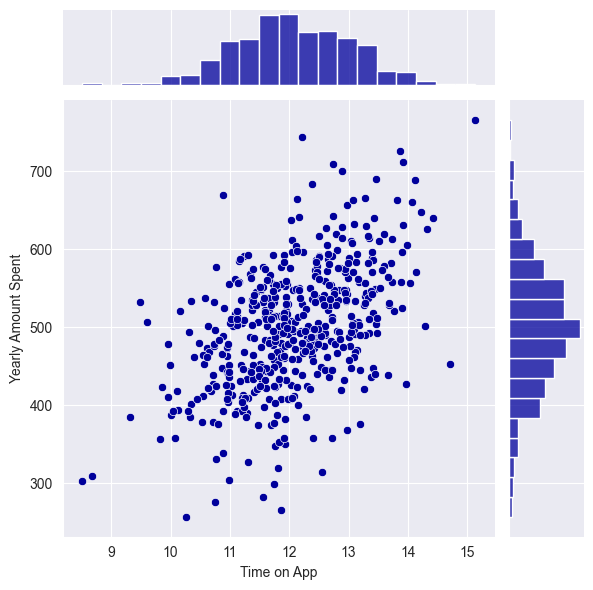

In [31]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

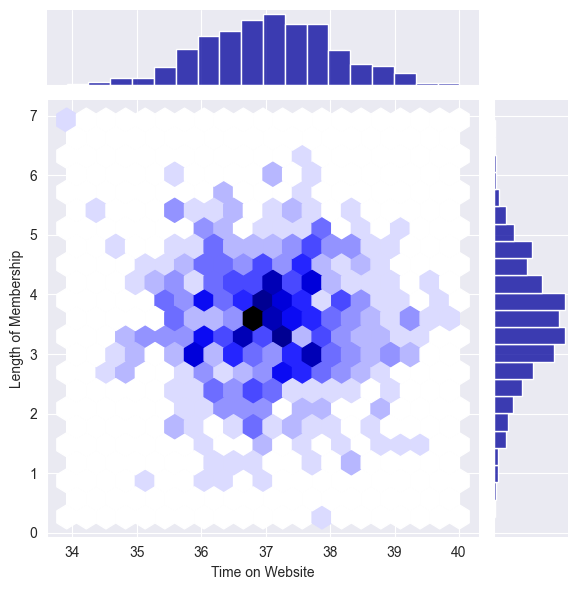

In [32]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=customers,kind='hex')

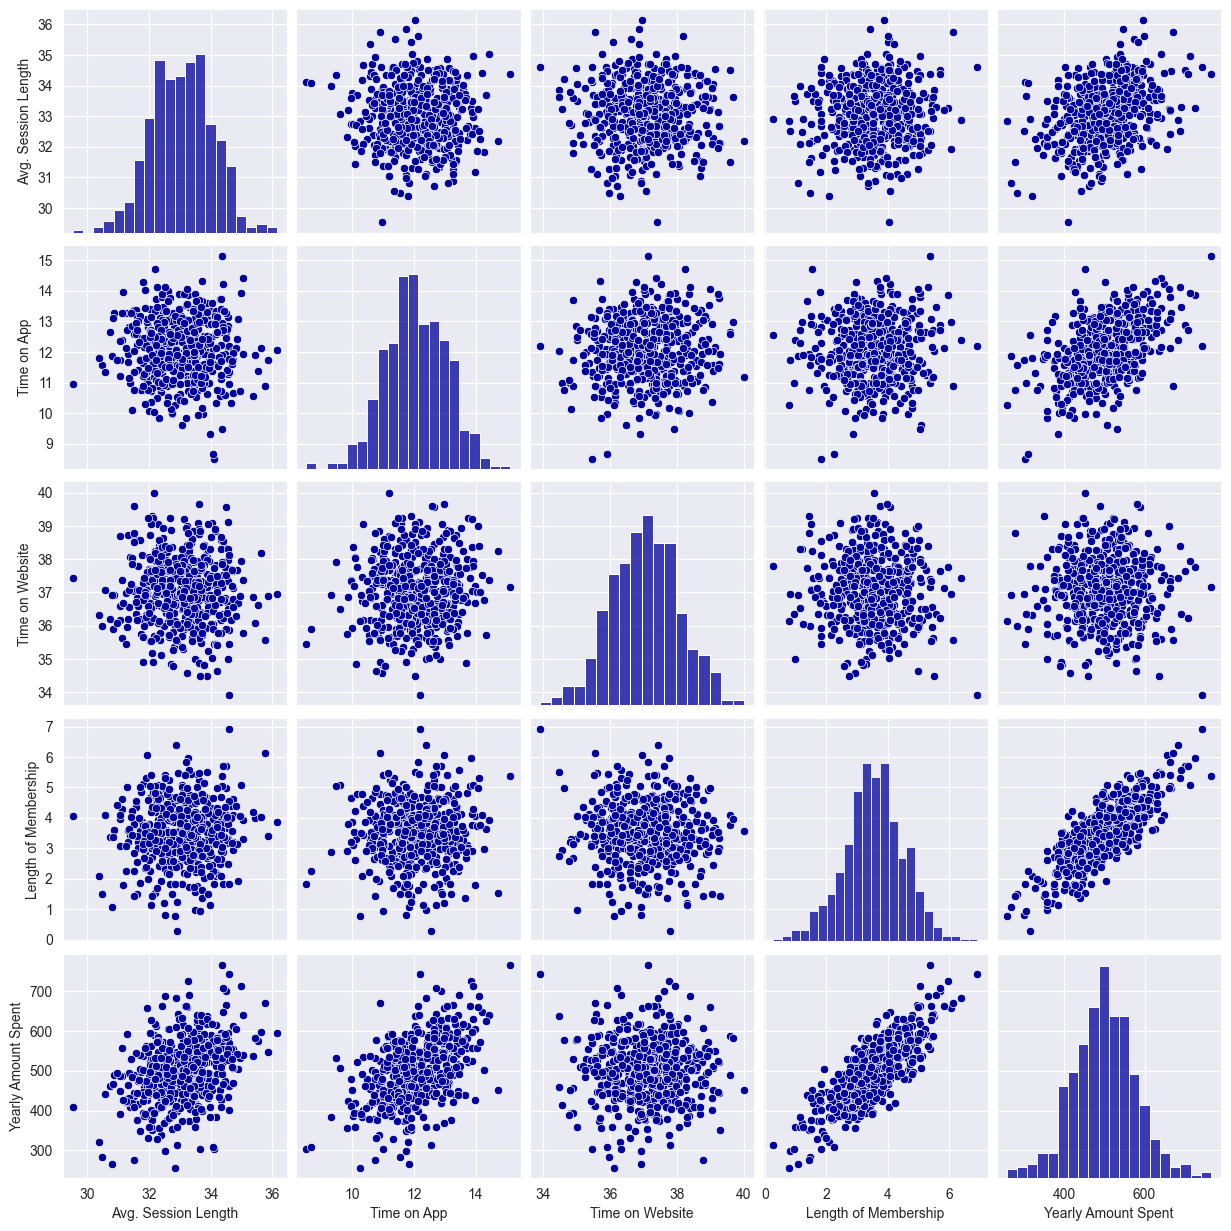

In [33]:
sns.pairplot(customers)

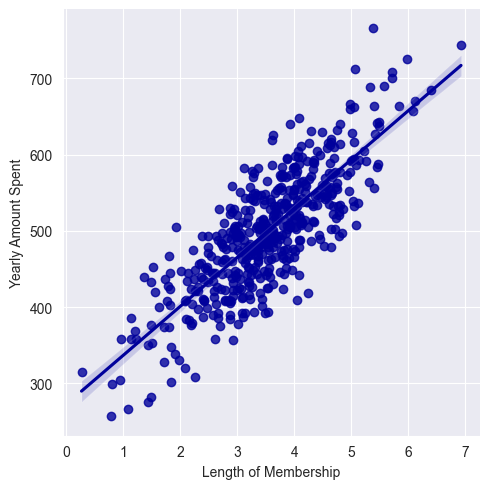

In [34]:
#WE CAN SEE THAT LENGTH OF MEMBERSHIP AND YEARLY AMOUNT SPENT ARE THE MOST CORRELATED FROM PAIRPLOT
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [59]:
#WE START LINEAR REGRESSION MODEL
from sklearn.model_selection import train_test_split

In [60]:
X=customers[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

In [61]:
X_test,X_train,y_test,y_train= train_test_split(X,y,test_size=0.33,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

In [64]:
print("Coeffecients: \n",lm.coef_)

Coeffecients: 
 [25.83666336 39.04379984  0.20553427 61.07190113]


In [65]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

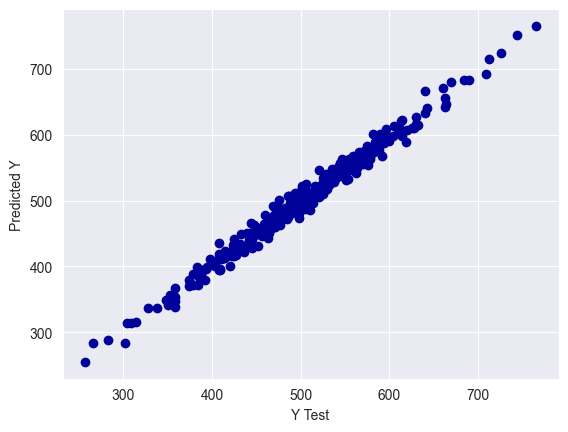

In [66]:
plt.scatter(y_test,predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

In [67]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test,predictions))
print("MSE:", metrics.mean_squared_error(y_test,predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.810541036957864
MSE: 99.60790933359318
RMSE: 9.980376212026938


In [68]:
#WE FIND THAT THE METRICS SHOW A GOOD VALUE SUITABLE FOR A HEALTHY MODEL

C:\Users\Irving0125Studio\AppData\Local\Temp\ipykernel_5532\2595535044.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Density'>

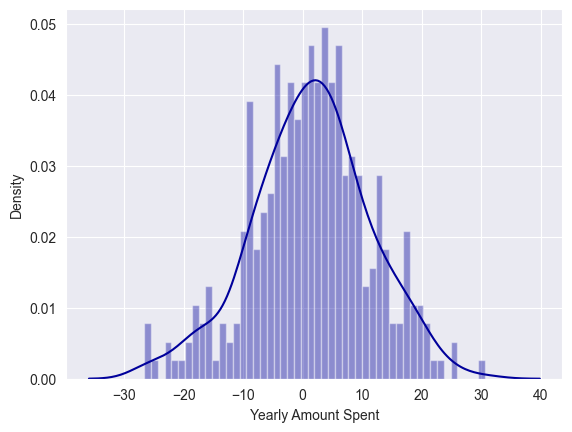

In [69]:
#PLOTTING THE HISTOGRAM OF RESIDUALS TO SEE IF IT IS NORMALLY DISTRIBUTED
sns.distplot((y_test-predictions),bins=50)

In [70]:
#CONCLUSION
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.836663
Time on App,39.043800
Time on Website,0.205534
Length of Membership,61.071901
